In [70]:
# Import packages
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

In [71]:
# Load datasets
df = pd.read_excel('Dokumenter\ChildrenWristFeaturesV2_TSF_new.xlsx') # path to file
df.fillna(df.mean(), inplace=True)

In [72]:
# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

# Decision Tree

In [73]:
# Quality of a split
criterion = ['entropy']               
# Strategy used to split at each node
splitter = ['best']                   
# Number of features to consider at every split
max_features = [30]                   
# Maximum depth
max_depth = [350]

# Dictionary to store the hyperparameters
param_grid_dt = { 'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth}

# Base model
dt = DecisionTreeClassifier(random_state=42)

In [74]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.3s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  16.8s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  16.7s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.2s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 30, 'splitter': 'best'}
0.6333400183191789


Feature: 0, Score: 0.04626
Feature: 1, Score: 0.02887
Feature: 2, Score: 0.04166
Feature: 3, Score: 0.04283
Feature: 4, Score: 0.02518
Feature: 5, Score: 0.03288
Feature: 6, Score: 0.05758
Feature: 7, Score: 0.04592
Feature: 8, Score: 0.04105
Feature: 9, Score: 0.03341
Feature: 10, Score: 0.11322
Feature: 11, Score: 0.04455
Feature: 12, Score: 0.00856
Feature: 13, Score: 0.02555
Feature: 14, Score: 0.04800
Feature: 15, Score: 0.01381
Feature: 16, Score: 0.03013
Feature: 17, Score: 0.01685
Feature: 18, Score: 0.01609
Feature: 19, Score: 0.14510
Feature: 20, Score: 0.02150
Feature: 21, Score: 0.03201
Feature: 22, Score: 0.00332
Feature: 23, Score: 0.01021
Feature: 24, Score: 0.01271
Feature: 25, Score: 0.01826
Feature: 26, Score: 0.01031
Feature: 27, Score: 0.01198
Feature: 28, Score: 0.01033
Feature: 29, Score: 0.01190


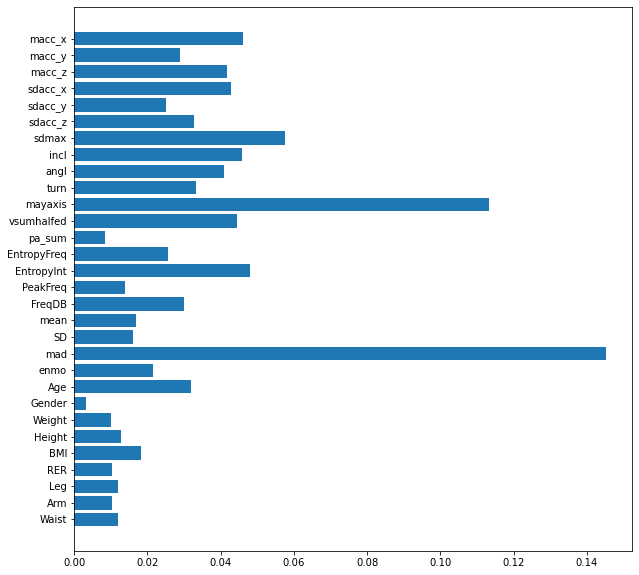

In [75]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), dt_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [76]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.015]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_stack = DecisionTreeClassifier(criterion='entropy', max_features=21, max_depth=350, random_state=42)
dt_stack.fit(X_train_new_dt, y_train_new_dt)
print("Train accuracy: ", dt_stack.score(X_train_new_dt, y_train_new_dt))
print("Test accuracy: ", dt_stack.score(X_test_new_dt, y_test_new_dt))

Train accuracy:  1.0
Test accuracy:  0.6410669203468589


In [77]:
from sklearn.metrics import classification_report
pred_train_dt = dt_stack.predict(X_train_new_dt)
pred_test_dt = dt_stack.predict(X_test_new_dt)
print(classification_report(y_train_new_dt, pred_train_dt))
print(classification_report(y_test_new_dt, pred_test_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00      1.00      1.00      6755
           3       1.00      1.00      1.00      6736
           4       1.00      1.00      1.00      6722
           5       1.00      1.00      1.00      6749
           6       1.00      1.00      1.00      6712
           7       1.00      1.00      1.00      6721
           8       1.00      1.00      1.00      6724
           9       1.00      1.00      1.00      4213
          10       1.00      1.00      1.00      3042
          12       1.00      1.00      1.00     48198

    accuracy                           1.00    109322
   macro avg       1.00      1.00      1.00    109322
weighted avg       1.00      1.00      1.00    109322

              precision    recall  f1-score   support

           1       0.77      0.74      0.75      1650
           2       0.77      0.76      0.77      1645
           3       0.74 

Confusion matrix, without normalization
[[1225   39   15    2    0    8   13    4   10   36  298]
 [  46 1255   44    1    0    5    9    2    1   18  264]
 [  17   32 1227    6    2   19   21   12    5    9  314]
 [   0    0    6  976  147   27   59   11   34    2  416]
 [   2    0    1  150  912  104   54    4   66    2  356]
 [   7    4   15   16  101 1067   60    9   47    3  359]
 [   9    7   16   63   57   78  587   43  145    7  667]
 [   2    6    8    8    9   21   41 1060   19    7  495]
 [   6    2   10   40   70   46  138   18  332    6  399]
 [  31    8    9    3    1    8    7    3    8  476  197]
 [ 252  281  313  448  348  363  664  513  399  197 8404]]
Normalized confusion matrix
[[7.42424242e-01 2.36363636e-02 9.09090909e-03 1.21212121e-03
  0.00000000e+00 4.84848485e-03 7.87878788e-03 2.42424242e-03
  6.06060606e-03 2.18181818e-02 1.80606061e-01]
 [2.79635258e-02 7.62917933e-01 2.67477204e-02 6.07902736e-04
  0.00000000e+00 3.03951368e-03 5.47112462e-03 1.21580547e-

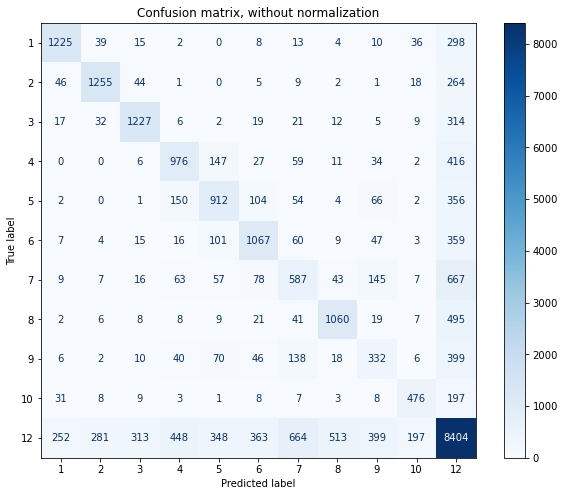

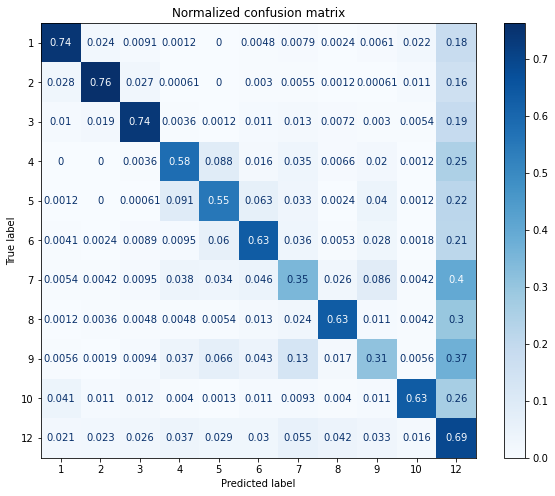

In [78]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(dt_stack, X_test_new_dt, y_test_new_dt,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# K-Nearest Neighbor

In [79]:
knn_stack = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')
knn_stack.fit(X_train, y_train)
print("Train accuracy: ", knn_stack.score(X_train, y_train))
print("Test accuracy: ", knn_stack.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.6787530642859756


In [80]:
from sklearn.metrics import classification_report
pred_train_knn = knn_stack.predict(X_train)
pred_test_knn = knn_stack.predict(X_test)
print(classification_report(y_train, pred_train_knn))
print(classification_report(y_test, pred_test_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00      1.00      1.00      6755
           3       1.00      1.00      1.00      6736
           4       1.00      1.00      1.00      6722
           5       1.00      1.00      1.00      6749
           6       1.00      1.00      1.00      6712
           7       1.00      1.00      1.00      6721
           8       1.00      1.00      1.00      6724
           9       1.00      1.00      1.00      4213
          10       1.00      1.00      1.00      3042
          12       1.00      1.00      1.00     48198

    accuracy                           1.00    109322
   macro avg       1.00      1.00      1.00    109322
weighted avg       1.00      1.00      1.00    109322

              precision    recall  f1-score   support

           1       0.75      0.73      0.74      1650
           2       0.73      0.74      0.74      1645
           3       0.74 

Confusion matrix, without normalization
[[1206   62   10    3    1    4    1    1    3   15  344]
 [  51 1224   48    2    1    1    3    2    0    4  309]
 [  12   41 1200   10    0   13    5    6    1    0  376]
 [   0    0    1 1144  137   10   18    3    5    0  360]
 [   0    0    1  164 1045  115   20    0   12    0  294]
 [   3    1   10   26   96 1156   33    5   22    0  336]
 [   2    2    4   59   44   46  682   15   98    3  724]
 [   0    4    3   10    3    7   19 1140   12    1  477]
 [   3    4    1   31   51   64   99   11  338    6  459]
 [  38   16   11    2    1    0    3    1    0  444  235]
 [ 285  317  341  444  359  288  406  482  180  108 8972]]
Normalized confusion matrix
[[7.30909091e-01 3.75757576e-02 6.06060606e-03 1.81818182e-03
  6.06060606e-04 2.42424242e-03 6.06060606e-04 6.06060606e-04
  1.81818182e-03 9.09090909e-03 2.08484848e-01]
 [3.10030395e-02 7.44072948e-01 2.91793313e-02 1.21580547e-03
  6.07902736e-04 6.07902736e-04 1.82370821e-03 1.21580547e-

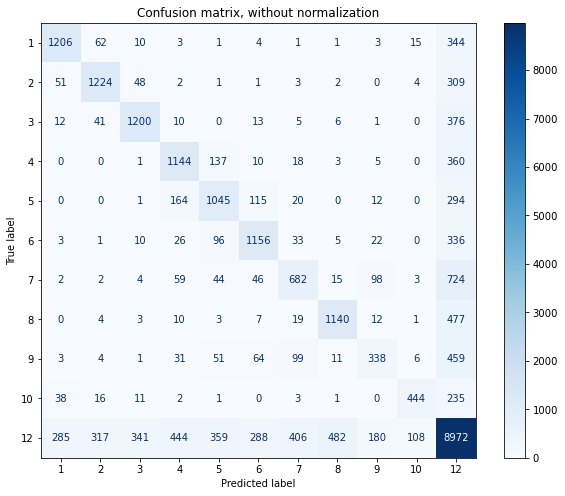

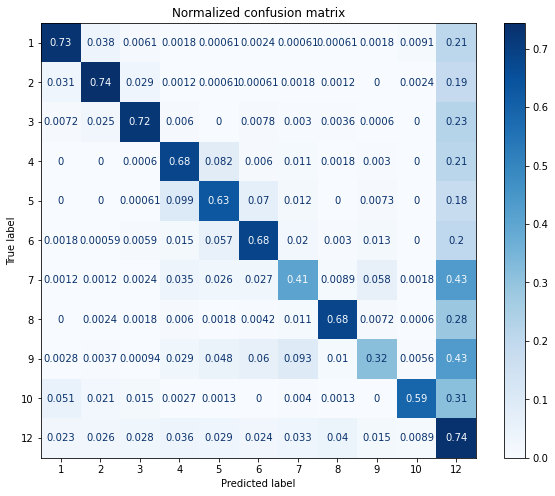

In [81]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(knn_stack, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Random Forest

In [82]:
# Number of trees
n_estimators = [50]
# Number of features to consider at every split
max_features = [22]

# Dictionary to store the hyperparameters
param_grid_rf = { 'n_estimators': n_estimators,
                  'max_features': max_features}

# Base model
rf = RandomForestClassifier(random_state=42)

In [83]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=22, n_estimators=50, total= 2.2min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 2.2min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 2.2min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 2.2min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 2.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.0min finished


{'max_features': 22, 'n_estimators': 50}
0.7369421969409633


Feature: 0, Score: 0.05298
Feature: 1, Score: 0.04194
Feature: 2, Score: 0.05054
Feature: 3, Score: 0.03783
Feature: 4, Score: 0.03265
Feature: 5, Score: 0.04016
Feature: 6, Score: 0.03166
Feature: 7, Score: 0.05544
Feature: 8, Score: 0.04652
Feature: 9, Score: 0.04204
Feature: 10, Score: 0.10815
Feature: 11, Score: 0.05178
Feature: 12, Score: 0.03510
Feature: 13, Score: 0.04146
Feature: 14, Score: 0.04279
Feature: 15, Score: 0.01626
Feature: 16, Score: 0.03078
Feature: 17, Score: 0.02982
Feature: 18, Score: 0.02368
Feature: 19, Score: 0.03610
Feature: 20, Score: 0.02899
Feature: 21, Score: 0.02274
Feature: 22, Score: 0.00530
Feature: 23, Score: 0.01090
Feature: 24, Score: 0.01511
Feature: 25, Score: 0.01805
Feature: 26, Score: 0.01178
Feature: 27, Score: 0.01364
Feature: 28, Score: 0.01132
Feature: 29, Score: 0.01449


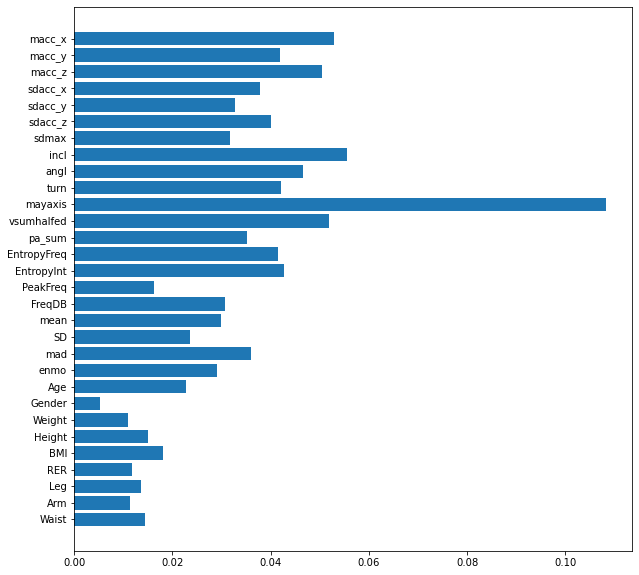

In [84]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), rf_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [85]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_stack = RandomForestClassifier(n_estimators=50, max_features=21, random_state=42)
rf_stack.fit(X_train_new_rf, y_train_new_rf)
print(rf_stack.score(X_train_new_rf, y_train_new_rf))
print(rf_stack.score(X_test_new_rf, y_test_new_rf))

0.9999451162620515
0.731111192418865


In [86]:
from sklearn.metrics import classification_report
pred_train_rf = rf_stack.predict(X_train_new_rf)
pred_test_rf = rf_stack.predict(X_test_new_rf)
print(classification_report(y_train_new_rf, pred_train_rf))
print(classification_report(y_test_new_rf, pred_test_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00      1.00      1.00      6755
           3       1.00      1.00      1.00      6736
           4       1.00      1.00      1.00      6722
           5       1.00      1.00      1.00      6749
           6       1.00      1.00      1.00      6712
           7       1.00      1.00      1.00      6721
           8       1.00      1.00      1.00      6724
           9       1.00      1.00      1.00      4213
          10       1.00      1.00      1.00      3042
          12       1.00      1.00      1.00     48198

    accuracy                           1.00    109322
   macro avg       1.00      1.00      1.00    109322
weighted avg       1.00      1.00      1.00    109322

              precision    recall  f1-score   support

           1       0.92      0.79      0.85      1650
           2       0.90      0.84      0.87      1645
           3       0.88 

Confusion matrix, without normalization
[[ 1296    14     6     0     0     0     1     0     0     5   328]
 [   16  1382    26     0     0     1     1     2     1     5   211]
 [    5    17  1312     1     0     1     5     1     2     1   319]
 [    0     0     0  1042   114     0     9     1     4     0   508]
 [    0     0     1   111  1057    87    26     1    23     0   345]
 [    1     0     5    18    69  1179    26     1    14     0   375]
 [    4     1     2    17    28    17   568     9    72     3   958]
 [    0     0     1     6     4     1    16  1133     7     0   508]
 [    0     1     0    18    42    34   107     6   238     2   619]
 [    9    11     3     0     0     0     0     1     0   463   264]
 [   78   118   143   265   277   216   281   342   113    37 10312]]
Normalized confusion matrix
[[7.85454545e-01 8.48484848e-03 3.63636364e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.06060606e-04 0.00000000e+00
  0.00000000e+00 3.03030303e-03 1.98787879e-01]


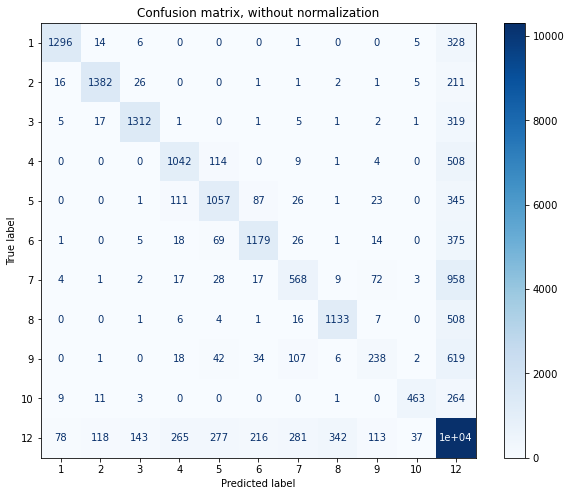

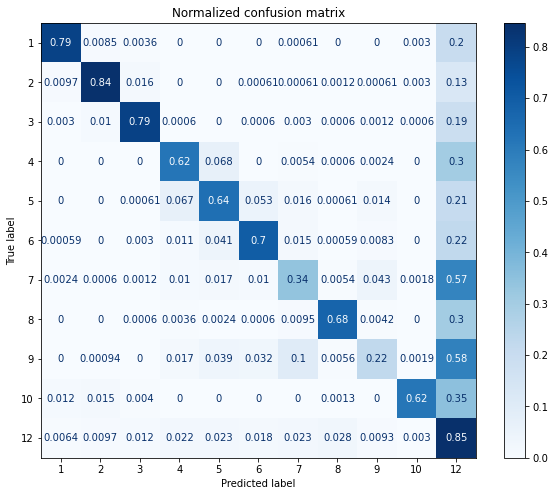

In [87]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(rf_stack, X_test_new_rf, y_test_new_rf,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# XGBoost

In [88]:
# Number of boosting rounds
n_estimators = [15]
# Maximum tree depth
max_depth = [15]
# Boosting learning rate
learning_rate  = [0.1]
# Number of samples used to fit each tree
subsample = [1.0]
# Number of features used to fit each tree
colsample_bytree = [1.0]

# Dictionary to store the hyperparameters
param_grid_xgb = { 'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate,
                   'subsample': subsample,
                   'colsample_bytree': colsample_bytree}

# Base model
xgb = XGBClassifier(use_label_encoder='false', random_state=42)

In [89]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)  #y_train[:, 0]
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.2min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[22:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.2min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[22:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.2min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.0min finished


[22:22:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.7217028117772557


Feature: 0, Score: 0.02888
Feature: 1, Score: 0.02056
Feature: 2, Score: 0.02926
Feature: 3, Score: 0.05857
Feature: 4, Score: 0.02183
Feature: 5, Score: 0.02466
Feature: 6, Score: 0.02398
Feature: 7, Score: 0.04104
Feature: 8, Score: 0.04115
Feature: 9, Score: 0.02559
Feature: 10, Score: 0.03481
Feature: 11, Score: 0.02922
Feature: 12, Score: 0.06793
Feature: 13, Score: 0.06303
Feature: 14, Score: 0.04825
Feature: 15, Score: 0.01778
Feature: 16, Score: 0.03564
Feature: 17, Score: 0.02427
Feature: 18, Score: 0.02114
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.05558
Feature: 22, Score: 0.03793
Feature: 23, Score: 0.03997
Feature: 24, Score: 0.04273
Feature: 25, Score: 0.04066
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.04022
Feature: 28, Score: 0.03836
Feature: 29, Score: 0.04693


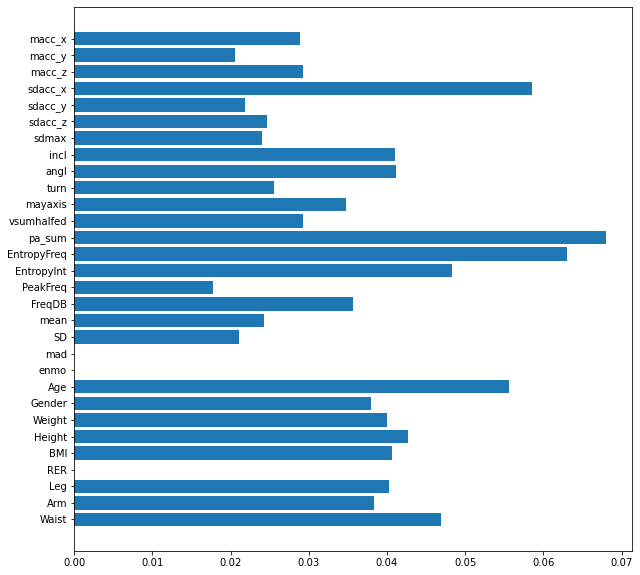

In [90]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [91]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.03]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_stack = XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42)
xgb_stack.fit(X_train_new_xgb, y_train_new_xgb)
print("Train accuracy: ", xgb_stack.score(X_train_new_xgb, y_train_new_xgb))
print("Test accuracy: ", xgb_stack.score(X_test_new_xgb, y_test_new_xgb))

[22:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  0.9094235378057481
Test accuracy:  0.7265010427719439


In [92]:
from sklearn.metrics import classification_report
pred_train_xgb = xgb_stack.predict(X_train_new_xgb)
pred_test_xgb = xgb_stack.predict(X_test_new_xgb)
print(classification_report(y_train_new_xgb, pred_train_xgb))
print(classification_report(y_test_new_xgb, pred_test_xgb))

              precision    recall  f1-score   support

           1       0.98      0.93      0.95      6750
           2       0.95      0.92      0.93      6755
           3       0.95      0.92      0.94      6736
           4       0.90      0.86      0.88      6722
           5       0.90      0.89      0.90      6749
           6       0.89      0.87      0.88      6712
           7       0.94      0.80      0.87      6721
           8       0.91      0.90      0.91      6724
           9       0.96      0.78      0.86      4213
          10       0.99      0.87      0.93      3042
          12       0.88      0.95      0.91     48198

    accuracy                           0.91    109322
   macro avg       0.93      0.88      0.91    109322
weighted avg       0.91      0.91      0.91    109322

              precision    recall  f1-score   support

           1       0.90      0.75      0.82      1650
           2       0.87      0.81      0.84      1645
           3       0.87 

Confusion matrix, without normalization
[[ 1243    27     6     0     0     1     0     1     0    11   361]
 [   21  1337    22     0     0     1     3     3     0     6   252]
 [    6    21  1275     4     0     3     6     1     2     3   343]
 [    0     0     1  1002   112     3     8     3     1     0   548]
 [    0     0     0   140  1010    81    21     3    20     0   376]
 [    1     1     2    20    72  1183    29     5    12     1   362]
 [    2     4     1    36    31    15   610     8   100     0   872]
 [    0     0     1     4     2     2     4  1192     4     0   467]
 [    1     0     1    25    36    37    75     5   372     3   512]
 [   13     4     5     2     0     0     0     2     2   459   264]
 [  101   150   153   299   250   273   284   323   145    31 10173]]
Normalized confusion matrix
[[7.53333333e-01 1.63636364e-02 3.63636364e-03 0.00000000e+00
  0.00000000e+00 6.06060606e-04 0.00000000e+00 6.06060606e-04
  0.00000000e+00 6.66666667e-03 2.18787879e-01]


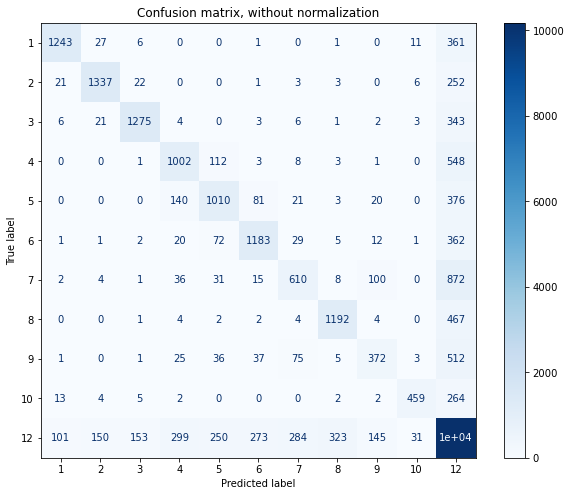

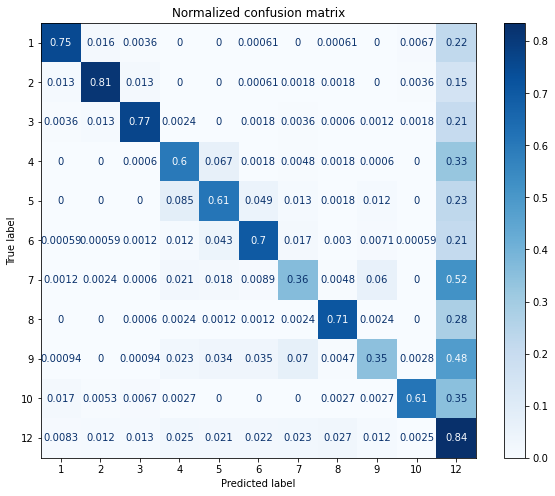

In [93]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(xgb_stack, X_test_new_xgb, y_test_new_xgb,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Stacked Ensemble

In [94]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Define the base models
estimators  = list()
estimators.append(('dt', dt_stack))
estimators.append(('knn', knn_stack))
estimators.append(('rf', rf_stack))
estimators.append(('xgb', xgb_stack))
# Define meta learner model
final_estimator = ExtraTreesClassifier(random_state=42) # GaussianNB (naive_bayes) or ExtraTreesClassifier
# Define the stacking ensemble
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stack.fit(X_train, y_train)
print("Train accuracy: ", stack.score(X_train, y_train))
print("Test accuracy: ", stack.score(X_test, y_test))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  0.9990486818755603


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Test accuracy:  0.7549302989279573


In [95]:
from sklearn.metrics import classification_report
pred_train_stack = stack.predict(X_train)
pred_test_stack = stack.predict(X_test)
print("---------------Classification report - train---------------")
print(classification_report(y_train, pred_train_stack))
print("---------------Classification report - test---------------")
print(classification_report(y_test, pred_test_stack))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---------------Classification report - train---------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       0.99      1.00      1.00      6755
           3       1.00      1.00      1.00      6736
           4       1.00      1.00      1.00      6722
           5       1.00      1.00      1.00      6749
           6       1.00      1.00      1.00      6712
           7       1.00      1.00      1.00      6721
           8       1.00      1.00      1.00      6724
           9       1.00      1.00      1.00      4213
          10       1.00      1.00      1.00      3042
          12       1.00      1.00      1.00     48198

    accuracy                           1.00    109322
   macro avg       1.00      1.00      1.00    109322
weighted avg       1.00      1.00      1.00    109322

---------------Classification report - test---------------
              precision    recall  f1-score   support

           1 

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix, without normalization
[[ 1377    22     1     0     0     0     0     0     3    12   235]
 [   26  1411    25     0     0     0     1     2     1     8   171]
 [   10    21  1365     5     0     4     4     0     2     1   252]
 [    0     0     2  1127   125     5    10     0     2     0   407]
 [    0     0     1   115  1113    79    23     0    21     0   299]
 [    1     0     9    12    68  1221    25     1    24     0   327]
 [    1     2     4    14    22    13   740     5    96     3   779]
 [    1     1     0     3     2     4    13  1226     8     0   418]
 [    1     0     0     5    37    28    75     1   426     4   490]
 [   10     6     5     0     0     0     2     0     1   542   185]
 [  106   132   169   282   283   229   315   348   178    55 10085]]


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Normalized confusion matrix
[[8.34545455e-01 1.33333333e-02 6.06060606e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.81818182e-03 7.27272727e-03 1.42424242e-01]
 [1.58054711e-02 8.57750760e-01 1.51975684e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.07902736e-04 1.21580547e-03
  6.07902736e-04 4.86322188e-03 1.03951368e-01]
 [6.00961538e-03 1.26201923e-02 8.20312500e-01 3.00480769e-03
  0.00000000e+00 2.40384615e-03 2.40384615e-03 0.00000000e+00
  1.20192308e-03 6.00961538e-04 1.51442308e-01]
 [0.00000000e+00 0.00000000e+00 1.19189511e-03 6.71632896e-01
  7.44934446e-02 2.97973778e-03 5.95947557e-03 0.00000000e+00
  1.19189511e-03 0.00000000e+00 2.42550656e-01]
 [0.00000000e+00 0.00000000e+00 6.05693519e-04 6.96547547e-02
  6.74136887e-01 4.78497880e-02 1.39309509e-02 0.00000000e+00
  1.27195639e-02 0.00000000e+00 1.81102362e-01]
 [5.92417062e-04 0.00000000e+00 5.33175355e-03 7.10900474e-03
  4.02843602e-02 7.23341232e-01 1.48104265e-02 5.9

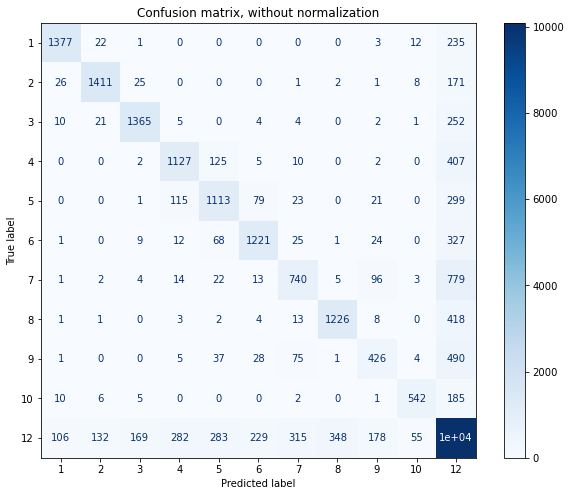

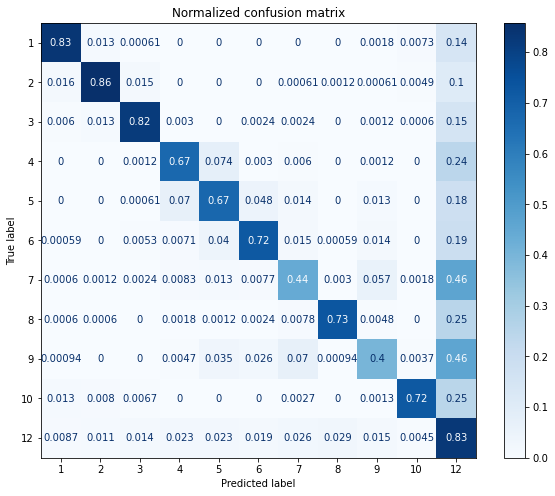

In [96]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(stack, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Multilayer Perceptron

In [97]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X = scal_data.fit_transform(X)

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# Split into 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=seed)
# Create model
model = Sequential()
model.add(Dense(40, input_dim=30, activation='relu', name='dense_1'))
model.add(Dense(100, activation='relu', name='dense_2'))
model.add(Dense(200, activation='relu', name='dense_3'))
model.add(Dense(100, activation='relu', name='dense_4')) 
model.add(Dense(11, activation='softmax', name='dense_5/output_layer'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #sparse_categorical_crossentropy --> if output is integers
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=50, verbose=1)

Epoch 1/100
2187/2187 [==============================] - 11s 5ms/step - loss: 1.2905 - accuracy: 0.4892 - val_loss: 1.1607 - val_accuracy: 0.5234
Epoch 2/100
2187/2187 [==============================] - 7s 3ms/step - loss: 1.1013 - accuracy: 0.5437 - val_loss: 1.0758 - val_accuracy: 0.5522
Epoch 3/100
2187/2187 [==============================] - 8s 4ms/step - loss: 1.0173 - accuracy: 0.5757 - val_loss: 1.0047 - val_accuracy: 0.5846
Epoch 4/100
2187/2187 [==============================] - 6s 3ms/step - loss: 0.9644 - accuracy: 0.5969 - val_loss: 0.9615 - val_accuracy: 0.6017
Epoch 5/100
2187/2187 [==============================] - 6s 3ms/step - loss: 0.9214 - accuracy: 0.6128 - val_loss: 0.9320 - val_accuracy: 0.6093
Epoch 6/100
2187/2187 [==============================] - 7s 3ms/step - loss: 0.8881 - accuracy: 0.6268 - val_loss: 0.9075 - val_accuracy: 0.6217
Epoch 7/100
2187/2187 [==============================] - 6s 3ms/step - loss: 0.8613 - accuracy: 0.6363 - val_loss: 0.8908 - val_a

In [98]:
from sklearn.metrics import classification_report
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(classification_report(numpy.argmax(y_train, axis=1), numpy.argmax(pred_train, axis=1)))  #onvert one hot encoded back to single digit
print(classification_report(numpy.argmax(y_test, axis=1), numpy.argmax(pred_test, axis=1)))   #convert one hot encoded back to single digit

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6692
           1       0.86      0.85      0.85      6644
           2       0.85      0.82      0.84      6711
           3       0.71      0.82      0.76      6715
           4       0.75      0.74      0.74      6733
           5       0.80      0.84      0.82      6811
           6       0.82      0.78      0.80      6682
           7       0.82      0.81      0.82      6769
           8       0.77      0.81      0.79      4198
           9       0.85      0.91      0.88      3010
          10       0.85      0.83      0.84     48357

    accuracy                           0.82    109322
   macro avg       0.81      0.83      0.82    109322
weighted avg       0.83      0.82      0.82    109322

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1708
           1       0.79      0.76      0.77      1756
           2       0.78 

--------------------Confusion Matrix--------------------
[[1426   36    8    0    1    5    6    2    4   11  209]
 [  52 1326   40    2    0    5    3    0    0   17  311]
 [  10   32 1271    7    0    6   11    5    6    9  332]
 [   0    0    1 1237  109    8   33    4    9    1  283]
 [   0    0    2  228 1006   90   24    1   42    0  274]
 [   2    2    9   19   87 1149   35    6   37    2  241]
 [   2    1   12   50   39   51  814   16  162    1  570]
 [   2    4    5    5    3    6   16 1145    4    1  440]
 [   1    3    3   10   39   37  126    8  510    9  336]
 [  21   11    1    1    1    0    4    0    3  615  126]
 [ 266  256  269  434  324  335  449  404  332  171 8783]]


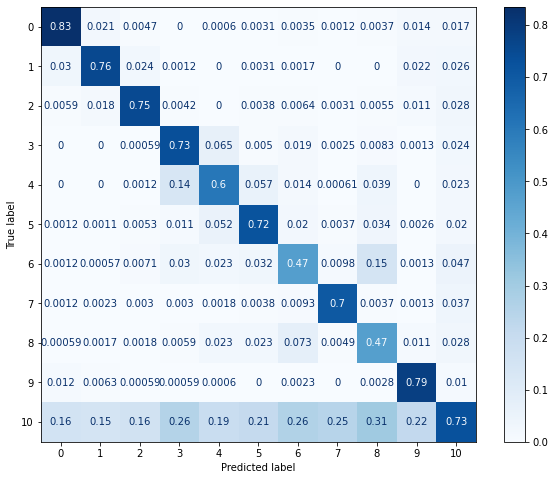

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
print("--------------------Confusion Matrix--------------------")
print(confusion_matrix(numpy.argmax(y_test, axis=1), numpy.argmax(pred_test, axis=1)))

cm = confusion_matrix(numpy.argmax(y_test, axis=1), numpy.argmax(pred_test, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
cm_norm = cm / cm.sum(axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,     #*100 
                               display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Change figure size
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# OneVsRestClassifier (for plotting ROC curves and AUC)

In [100]:
# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Binarize the output
Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

In [101]:
from sklearn.multiclass import OneVsRestClassifier
# Decision Tree
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_features=21, max_depth=350, random_state=42))
dt_y_score = dt_classifier.fit(X_train_new_dt, y_train_new_dt).predict_proba(X_test_new_dt)

# K-Nearest Neighbor
X_train_new_knn, X_test_new_knn, y_train_new_knn, y_test_new_knn = train_test_split(X, Y, test_size=0.2, random_state=42)
knn_classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')) 
knn_y_score = knn_classifier.fit(X_train_new_knn, y_train_new_knn).predict_proba(X_test_new_knn)

# Random Forest
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_features=21, random_state=42))
rf_y_score = rf_classifier.fit(X_train_new_rf, y_train_new_rf).predict_proba(X_test_new_rf)

# XGBoost
#X_new_xgb = df_features.iloc[:, importance_xgb>=0.02]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_classifier = OneVsRestClassifier(XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42))
xgb_y_score = xgb_classifier.fit(X_train_new_xgb, y_train_new_xgb).predict_proba(X_test_new_xgb)

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [102]:
# Staking classifier
# Define the base models
estimat  = list()
estimat.append(('DT', dt_classifier))
estimat.append(('KNN', knn_classifier))
estimat.append(('RF', rf_classifier))
estimat.append(('XGB', xgb_classifier))
# Define meta learner model
final_estimat = ExtraTreesClassifier(random_state=42) # GaussianNB (naive_bayes) or ExtraTreesClassifier
# Define the stacking ensemble
st_classifier = StackingClassifier(estimators=estimat , final_estimator=final_estimat, cv=5)
# Fit the model
X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
st_classifier = OneVsRestClassifier(st_classifier)
st_y_score = xgb_classifier.fit(X_train_new_st, y_train_new_st).predict_proba(X_test_new_st)

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [103]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier

# Define MLP model in a function
def mlp_model():
    model = Sequential()
    model.add(Dense(40, input_dim=30, activation='relu', name='dense_1'))
    model.add(Dense(100, activation='relu', name='dense_2'))
    model.add(Dense(200, activation='relu', name='dense_3'))
    model.add(Dense(100, activation='relu', name='dense_4'))
    model.add(Dense(11, activation='softmax', name='dense_5/output_layer'))  #activation=’softmax’ for multi classification
# Compile MLP model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #sparse_categorical_crossentropy
    return model

X_train_new_mlp, X_test_new_mlp, y_train_new_mlp, y_test_new_mlp = train_test_split(X, Y, test_size=0.2, random_state=42)
mlp_classifier = OneVsRestClassifier(KerasClassifier(mlp_model, epochs=1, batch_size=5, verbose=1))
mlp_y_score = mlp_classifier.fit(X_train_new_mlp, y_train_new_mlp).predict_proba(X_test_new_mlp)

5467/5467 [==============================] - 4s 740us/step


# Plotting ROC curves - Micro-average

<ipython-input-104-287610e6fad9>:98: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-104-287610e6fad9>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-104-287610e6fad9>:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-104-287610e6fad9>:113: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-104-287610e6fad9>:118: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr

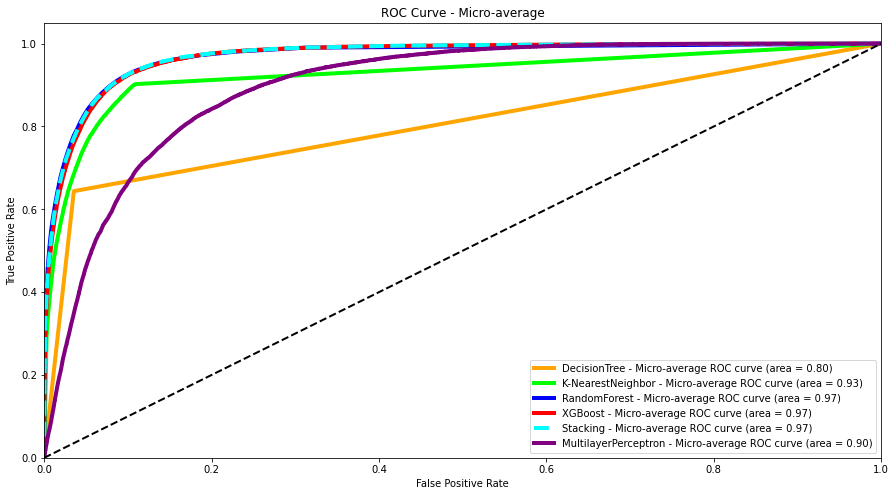

In [104]:
from sklearn.metrics import roc_curve, auc
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        

# Compute ROC curve and ROC area for each class (MultilayerPerceptron)    
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test_new_mlp[:, i], mlp_y_score[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])            
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# Compute micro-average ROC curve and ROC area (MultilayerPerceptron)
fpr_mlp["micro"], tpr_mlp["micro"], _ = roc_curve(y_test_new_mlp.ravel(), mlp_y_score.ravel())
roc_auc_mlp["micro"] = auc(fpr_mlp["micro"], tpr_mlp["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# First aggregate all false positive rates (MultilayerPerceptron)
all_fpr_mlp = np.unique(np.concatenate([fpr_mlp[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      

# Then interpolate all ROC curves at this points (MultilayerPerceptron)
mean_tpr_mlp = np.zeros_like(all_fpr_mlp)
for i in range(n_classes):
    mean_tpr_mlp += interp(all_fpr_mlp, fpr_mlp[i], tpr_mlp[i])
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Finally average it and compute AUC (MultilayerPerceptron)
mean_tpr_mlp /= n_classes

fpr_mlp["macro"] = all_fpr_mlp
tpr_mlp["macro"] = mean_tpr_mlp
roc_auc_mlp["macro"] = auc(fpr_mlp["macro"], tpr_mlp["macro"])

# Plot ROC curves (micro-average for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot micro curve (MultilayerPerceptron)
plt.plot(fpr_mlp["micro"], tpr_mlp["micro"],
         label='MultilayerPerceptron - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_mlp["micro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

# # Plotting ROC curves - Macro-average

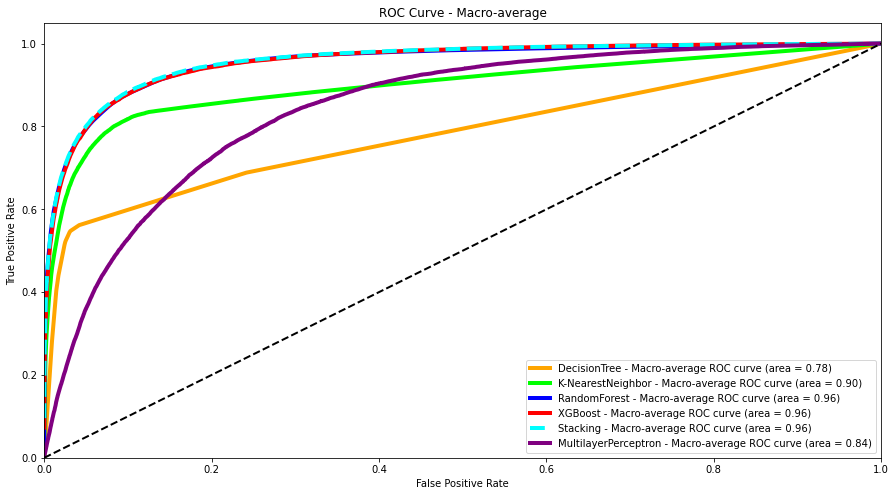

In [105]:
# Plot ROC curves (macro-average for all classifiers)
plt.figure(figsize=(15, 8))

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot macro curve (MultilayerPerceptron)
plt.plot(fpr_mlp["macro"], tpr_mlp["macro"],
         label='MultilayerPerceptron - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_mlp["macro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro-average')
plt.legend(loc="lower right")
plt.show()

# Plotting AUC scores - barchart

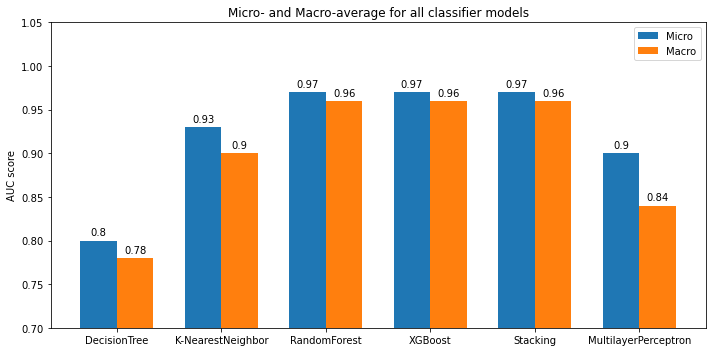

In [106]:
# Plot AUC
labels = ['DecisionTree', 'K-NearestNeighbor', 'RandomForest', 'XGBoost', 'Stacking', 'MultilayerPerceptron']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2), round(roc_auc_rf["micro"], 2), round(roc_auc_xgb["micro"], 2), round(roc_auc_st["micro"], 2), round(roc_auc_mlp["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2), round(roc_auc_rf["macro"], 2), round(roc_auc_xgb["macro"], 2), round(roc_auc_st["macro"], 2), round(roc_auc_mlp["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Adjust height and width of figure
fig.set_figheight(5)
fig.set_figwidth(10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC score')
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.7, 1.05])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Table - Test dataset results

## Precision

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||<span style="color:blue">Stacking</span>||MultilayerPerceptron|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.77||0.75||0.92||0.90||0.90||0.79|
|Class 2||0.77||0.73||0.90||0.87||0.88||0.77|
|Class 3||0.74||0.74||0.88||0.87||0.86||0.76|
|Class 4||0.57||0.60||0.71||0.65||0.72||0.63|
|Class 5||0.55||0.60||0.66||0.67||0.67||0.62|
|Class 6||0.61||0.68||0.77||0.74||0.77||0.67|
|Class 7||0.36||0.53||0.55||0.59||0.61||0.51|
|Class 8||0.63||0.68||0.76||0.77||0.77||0.73|
|Class 9||0.31||0.50||0.50||0.57||0.56||0.49|
|Class 10||0.62||0.76||0.90||0.89||0.87||0.73|
|Class 12||0.69||0.70||0.70||0.70||0.74||0.73|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||0.60||0.66||0.75||0.75||<span style="color:blue">0.76</span>||0.68|
|Weighted avg||0.64||0.68||0.73||0.73||<span style="color:blue">0.75</span>||0.70|

## Recall

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||<span style="color:blue">Stacking</span>||MultilayerPerceptron|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.74||0.73||0.79||0.75||0.83||0.80|
|Class 2||0.76||0.74||0.84||0.81||0.86||0.79|
|Class 3||0.74||0.72||0.79||0.77||0.82||0.81|
|Class 4||0.58||0.68||0.62||0.60||0.67||0.66|
|Class 5||0.55||0.63||0.64||0.61||0.67||0.62|
|Class 6||0.63||0.68||0.70||0.70||0.72||0.72|
|Class 7||0.35||0.41||0.34||0.36||0.44||0.49|
|Class 8||0.63||0.68||0.68||0.71||0.73||0.65|
|Class 9||0.31||0.32||0.22||0.35||0.40||0.40|
|Class 10||0.63||0.59||0.62||0.61||0.72||0.74|
|Class 12||0.69||0.74||0.85||0.84||0.83||0.73|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||0.60||0.63||0.64||0.65||<span style="color:blue">0.70</span>||0.67|
|Weighted avg||0.64||0.68||0.73||0.73||<span style="color:blue">0.75</span>||0.70|

## f1-score

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||<span style="color:blue">Stacking</span>||MultilayerPerceptron|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.75||0.74||0.85||0.82||0.87||0.80|
|Class 2||0.77||0.74||0.87||0.84||0.87||0.78|
|Class 3||0.74||0.73||0.83||0.81||0.84||0.78|
|Class 4||0.58||0.64||0.66||0.62||0.70||0.65|
|Class 5||0.55||0.62||0.65||0.64||0.67||0.62|
|Class 6||0.62||0.68||0.73||0.72||0.75||0.69|
|Class 7||0.35||0.46||0.42||0.45||0.51||0.50|
|Class 8||0.63||0.68||0.71||0.74||0.75||0.69|
|Class 9||0.31||0.39||0.31||0.43||0.47||0.44|
|Class 10||0.63||0.67||0.73||0.73||0.79||0.74|
|Class 12||0.69||0.72||0.77||0.76||0.78||0.73|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||0.64||0.68||0.73||0.73||<span style="color:blue">0.75</span>||0.70|
|Macro avg||0.60||0.64||0.68||0.69||<span style="color:blue">0.73</span>||0.67|
|Weighted avg||0.64||0.67||0.72||0.72||<span style="color:blue">0.75</span>||0.70|

## Support

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||MultilayerPerceptron|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||1650||1650||1650||1650||1650||1708|
|Class 2||1645||1645||1645||1645||1645||1756|
|Class 3||1664||1664||1664||1664||1664||1689|
|Class 4||1678||1678||1678||1678||1678||1685|
|Class 5||1651||1651||1651||1651||1651||1667|
|Class 6||1688||1688||1688||1688||1688||1589|
|Class 7||1679||1679||1679||1679||1679||1718|
|Class 8||1676||1676||1676||1676||1676||1631|
|Class 9||1067||1067||1067||1067||1067||1082|
|Class 10||751||751||751||751||751||783|
|Class 12||12182||12182||12182||12182||12182||12023|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||27331||27331||27331||27331||27331||27331|
|Macro avg||27331||27331||27331||27331||27331||27331|
|Weighted avg||27331||27331||27331||27331||27331||27331|